In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams.update({
  "text.usetex": True,
})

In [2]:
plt.rc('lines', linewidth=2)    # controls line width

plt.rc('font', size=30)         # controls default text sizes
plt.rc('axes', titlesize=30)    # fontsize of the axes title
plt.rc('axes', labelsize=30)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=30)   # fontsize of the tick labels
plt.rc('ytick', labelsize=30)   # fontsize of the tick labels
plt.rc('legend', fontsize=30)   # legend fontsize
plt.rc('figure', titlesize=34)  # fontsize of the figure title

In [3]:
# global parmas
f_params = {'mean': 165, 'std': 9}
m_params = {'mean': 180, 'std': 9}
start, end = 130, 210
x = np.linspace(start, end, 1000)

def normal_dist(x, mean, std):
    return norm.pdf(x, mean, std)

likelihoods = {
    'female': normal_dist(x, f_params['mean'], f_params['std']),
    'male': normal_dist(x, m_params['mean'], m_params['std'])
}

### Dependence of posterier on priors for a fixed 0-1 loss

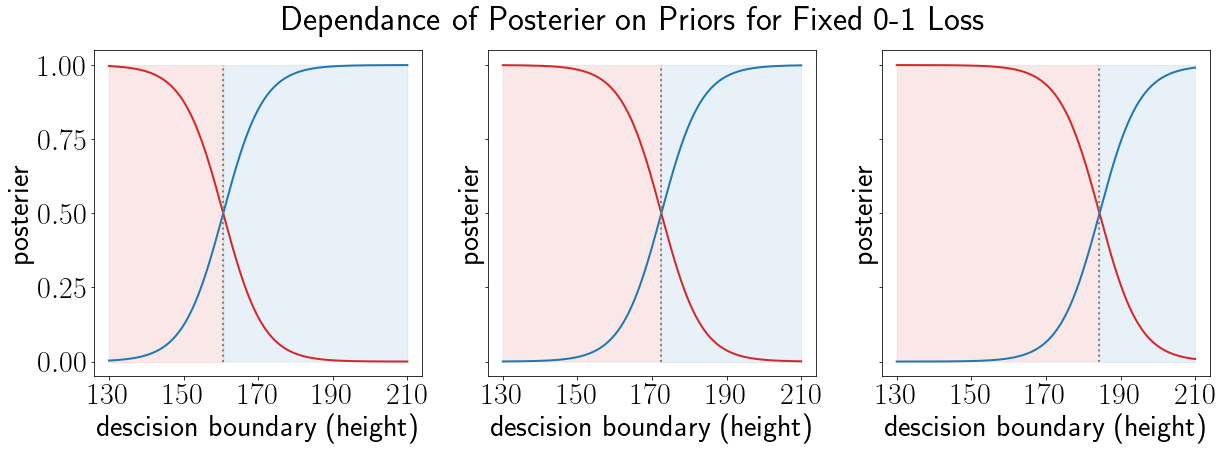

In [4]:
priors_list = [0.1, 0.5, 0.9]

loss_values = {
    'female': 1,
    'male': 1
}

fig, axes = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(20, 6))
fig.suptitle('Dependance of Posterier on Priors for Fixed 0-1 Loss')

for p, ax in zip(priors_list, axes.flatten()):
    priors = {
        'female': p,
        'male': 1-p
    }

    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }
    
    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]

    # ax.set_title(f'Priors Female: {priors["female"]}')
    ax.set_xticks(np.arange(min(x), max(x)+1, 20))
    ax.fill_between(x, np.zeros_like(x), np.ones_like(x), where=x<decision_boundary ,color='tab:red', alpha=0.1)
    ax.fill_between(x, np.zeros_like(x), np.ones_like(x), where=x>decision_boundary ,color='tab:blue', alpha=0.1)
    ax.plot(x, posteriers['female'], label='female', c='tab:red')
    ax.plot(x, posteriers['male'], label='male', c='tab:blue')
    ax.vlines(decision_boundary, 0, 1, color='gray', linestyle='dotted', label='desision boundry')
    ax.set_xlabel('descision boundary (height)')
    ax.set_ylabel('posterier')
    # ax.legend()

# plt.savefig(f"report-latex/images/prior-posteriers.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

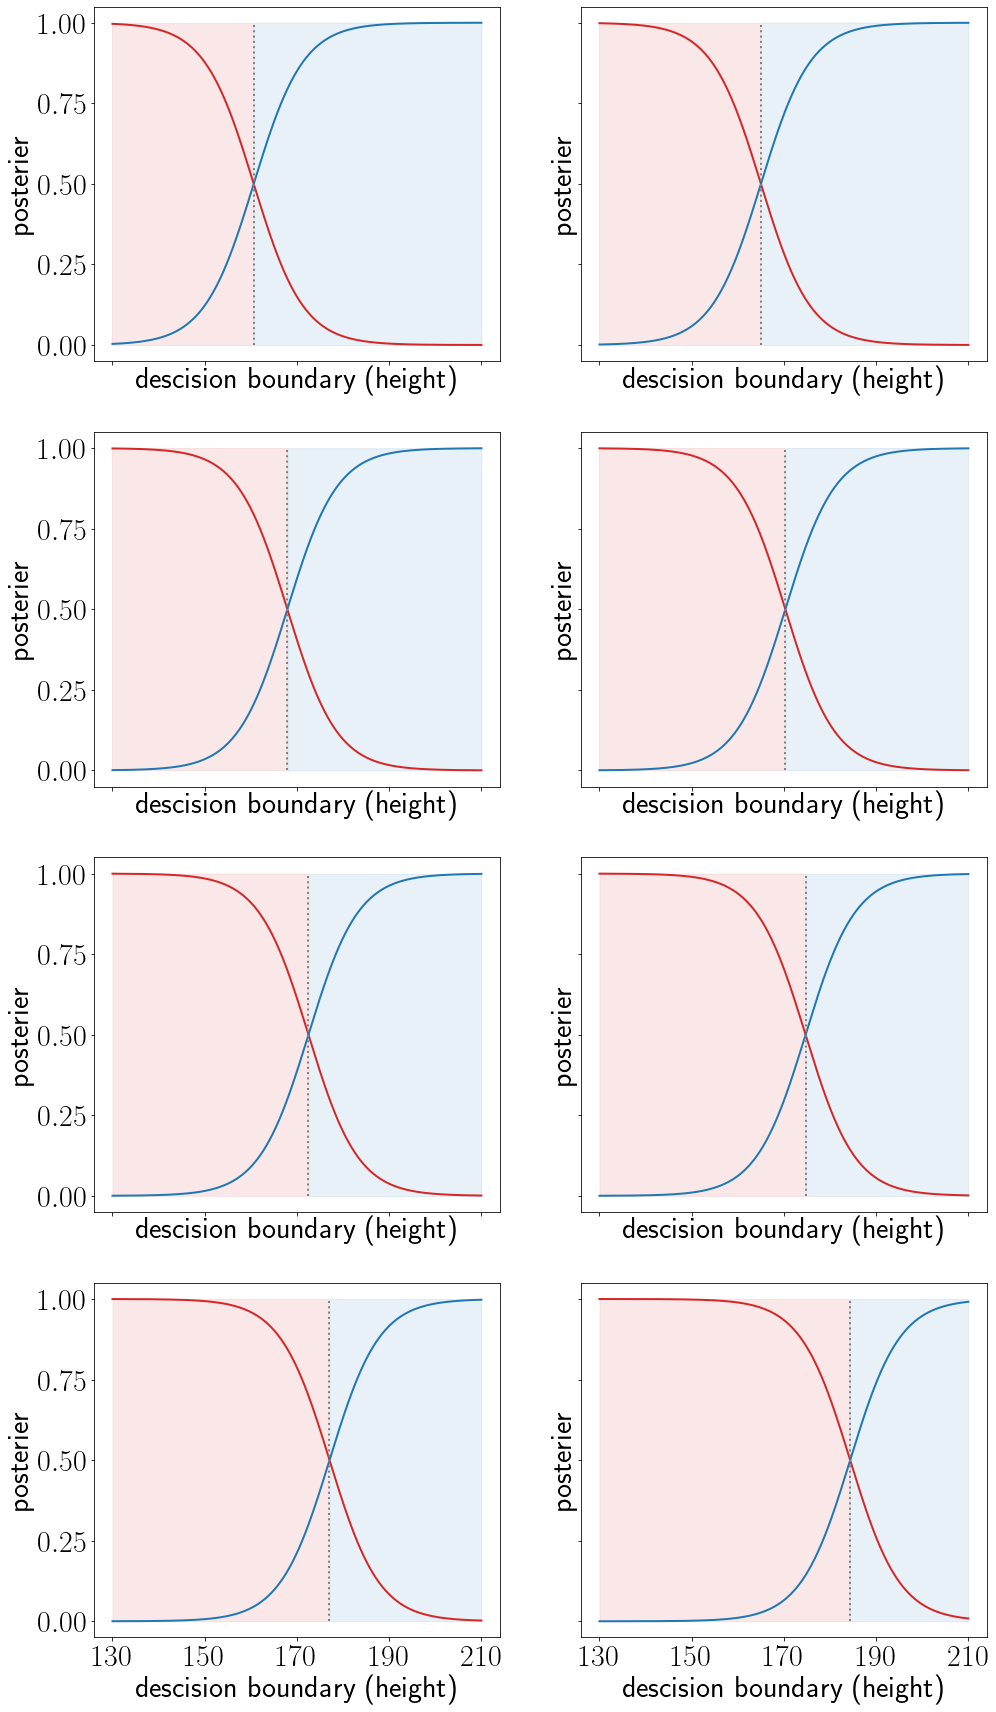

In [5]:
priors_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]

loss_values = {
    'female': 1,
    'male': 1
}

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, sharey=True, figsize=(16, 30))
# fig.suptitle('Dependace of Posterier on Priors for Fixed 0-1 Loss')

for p, ax in zip(priors_list, axes.flatten()):
    priors = {'female': p, 'male': 1-p}
    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }
    
    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]

    # ax.set_title(f'Priors Female: {priors["female"]}')
    ax.set_xticks(np.arange(min(x), max(x)+1, 20))
    ax.fill_between(x, np.zeros_like(x), np.ones_like(x), where=x<decision_boundary ,color='tab:red', alpha=0.1)
    ax.fill_between(x, np.zeros_like(x), np.ones_like(x), where=x>decision_boundary ,color='tab:blue', alpha=0.1)
    ax.plot(x, posteriers['female'], label='female', c='tab:red')
    ax.plot(x, posteriers['male'], label='male', c='tab:blue')
    ax.vlines(decision_boundary, 0, 1, color='gray', linestyle='dotted', label='desision boundry')
    ax.set_xlabel('descision boundary (height)')
    ax.set_ylabel('posterier')
    # ax.legend()

    # plt.savefig(f"report-latex/images/prior-posteriers-full.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Dependence of decision boundary on priors for a fixed 0-1 loss

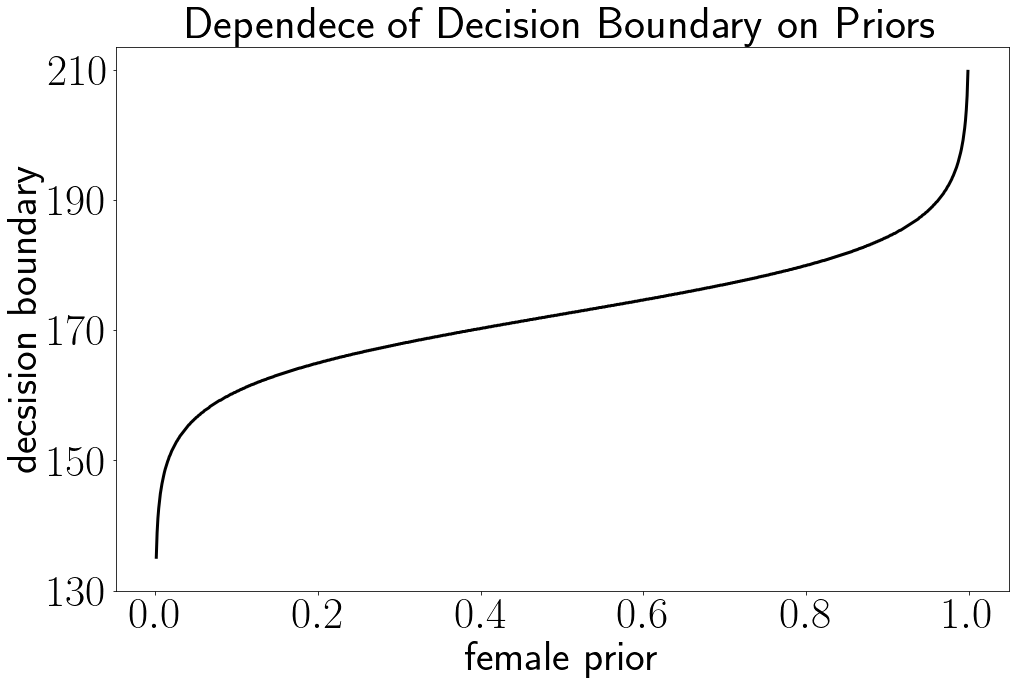

In [6]:
priors_list = list(np.linspace(0.001, 0.999, 1000))
db_list = []

loss_values = {
    'female': 1,
    'male': 1
}

for p in priors_list:
    priors = {'female': p, 'male': 1-p}

    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }

    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]

    db_list.append(decision_boundary)

plt.figure(figsize=(16, 10))
plt.title('Dependece of Decision Boundary on Priors', fontsize=45)
plt.plot(priors_list, db_list, color='black', linewidth=3, label='decision boundary in repect to priors')
plt.xlabel('female prior', fontsize=42)
plt.xticks(fontsize=44)
plt.ylabel('decsision boundary', fontsize=42)
plt.yticks(np.arange(min(x), max(x)+1, 20), fontsize=44)
# plt.legend()
plt.show()

# plt.savefig(f"report-latex/images/prior-decsision_boundary.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Dependence of the conditional error on the loss for a fixed prior of 0.5

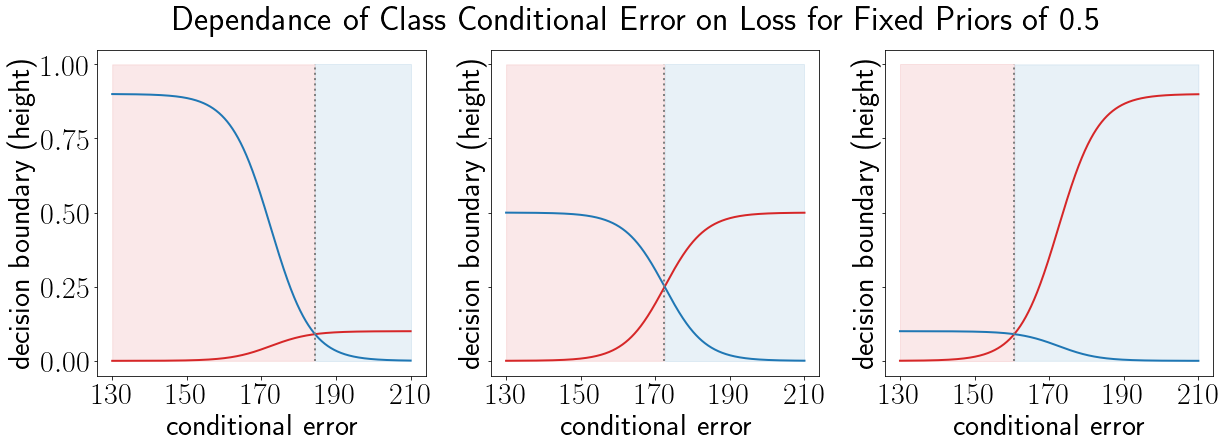

In [7]:
priors = {
    'female': 0.5,
    'male': 0.5
}

loss_values_list = [0.1, 0.5, 0.9]
# loss_values_list = {1, 5, 9}

fig, axes = plt.subplots(ncols=3, nrows=1, sharex=True, sharey=True, figsize=(20, 6))
fig.suptitle('Dependance of Class Conditional Error on Loss for Fixed Priors of 0.5')

for l, ax in zip(loss_values_list, axes.flatten()):
    loss_values = {'female': l, 'male': 1-l}
    # loss_values = {'female': l, 'male': 1}

    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }
    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]
    
    # ax.set_title(f'Loss Value Female: {loss_values["female"]}')
    ax.set_xticks(np.arange(min(x), max(x)+1, 20))
    ax.fill_between(x, np.zeros_like(x), np.ones_like(x), where=x<decision_boundary ,color='tab:red', alpha=0.1)
    ax.fill_between(x, np.zeros_like(x), np.ones_like(x), where=x>decision_boundary ,color='tab:blue', alpha=0.1)
    ax.plot(x, conditional_errors['female'], label='female', c='tab:red')
    ax.plot(x, conditional_errors['male'], label='male', c='tab:blue')
    # ax.plot(x, conditional_errors['female'] + conditional_errors['male'], label='conditional error', c='black')
    ax.vlines(decision_boundary, 0, 1, color='gray', linestyle='dotted', label='desision boundry')
    ax.set_xlabel('conditional error')
    ax.set_ylabel('decision boundary (height)')
    # ax.legend()

# plt.savefig(f"report-latex/images/loss_values-class_conditional_error.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

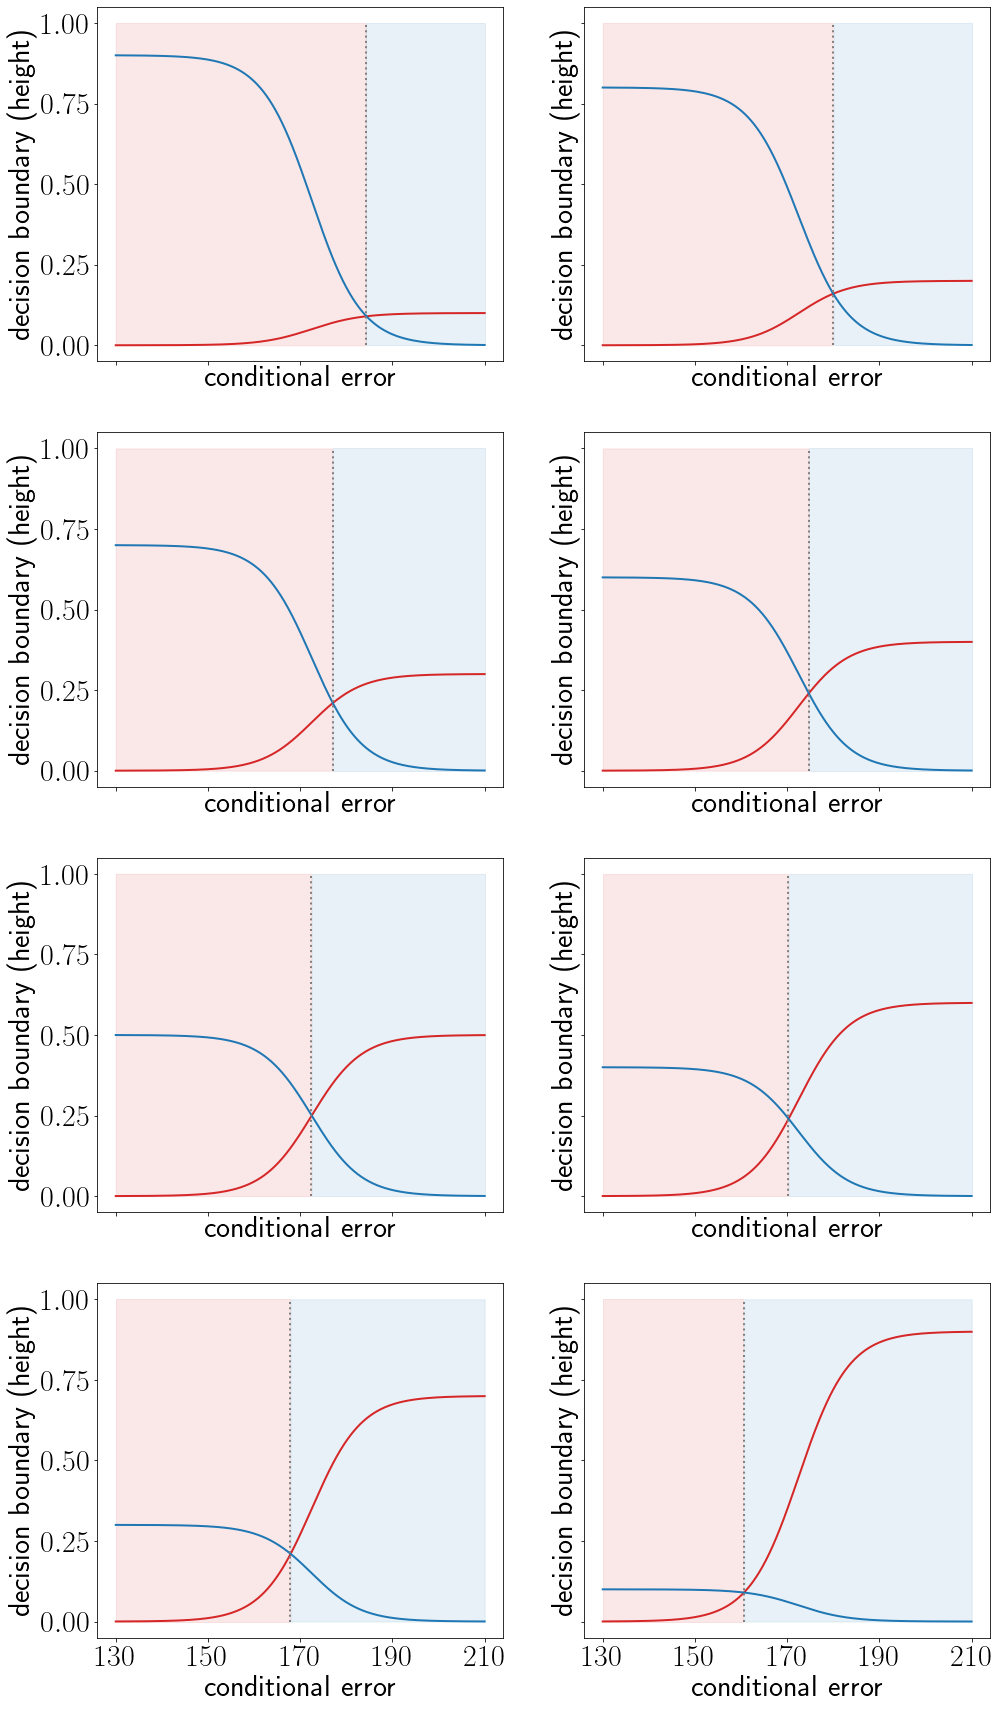

In [8]:
loss_values_list = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.9]

priors = {
    'female': 0.5,
    'male': 0.5
}

fig, axes = plt.subplots(ncols=2, nrows=4, sharex=True, sharey=True, figsize=(16, 30))
# fig.suptitle('Dependance of Class Conditional Error on Loss for Fixed Priors of 0.5')

for l, ax in zip(loss_values_list, axes.flatten()):
    loss_values = {'female': l, 'male': 1-l}

    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }
    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]
    
    # ax.set_title(f'Loss Value Female: {loss_values["female"]}')
    ax.set_xticks(np.arange(min(x), max(x)+1, 20))
    ax.fill_between(x, np.zeros_like(x), np.ones_like(x), where=x<decision_boundary ,color='tab:red', alpha=0.1)
    ax.fill_between(x, np.zeros_like(x), np.ones_like(x), where=x>decision_boundary ,color='tab:blue', alpha=0.1)
    ax.plot(x, conditional_errors['female'], label='female', c='tab:red')
    ax.plot(x, conditional_errors['male'], label='male', c='tab:blue')
    # ax.plot(x, conditional_errors['female'] + conditional_errors['male'], label='conditional error', c='black')
    ax.vlines(decision_boundary, 0, 1, color='gray', linestyle='dotted', label='desision boundry')
    ax.set_xlabel('conditional error')
    ax.set_ylabel('decision boundary (height)')
    # ax.legend()

    # plt.savefig(f"report-latex/images/loss_values-class_conditional_error-full.png", dpi=300, bbox_inches='tight', pad_inches=0.1)


### Dependence of the decision Boundary on fthe loss for fixed priors of 0.5

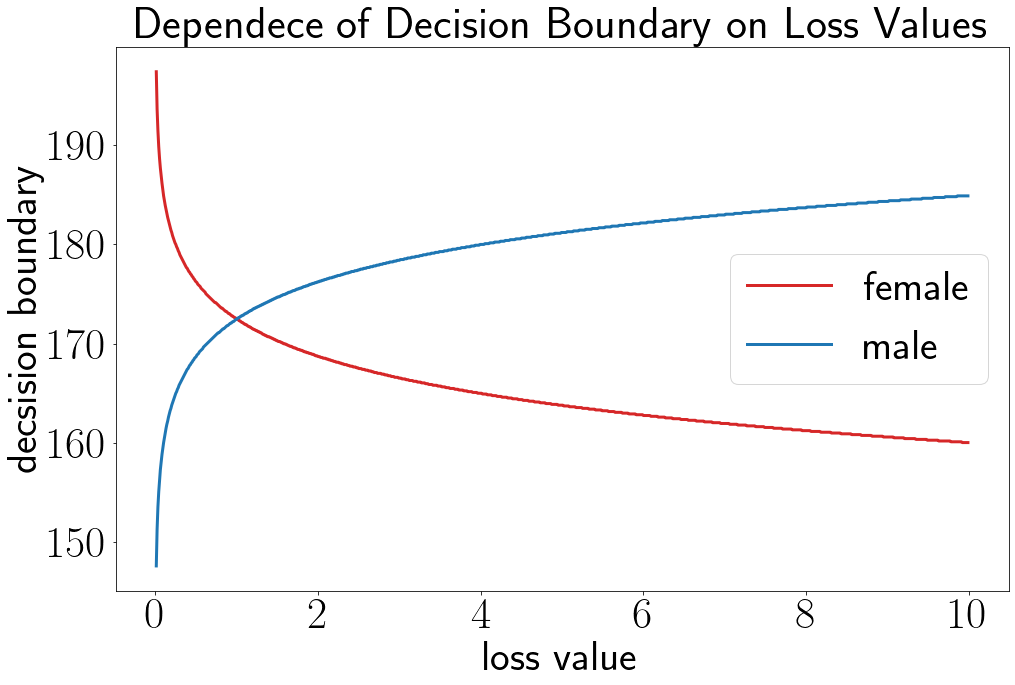

In [9]:
priors = {
    'female': 0.5,
    'male': 0.5
}

x_axis = np.arange(0.01, 10, 0.01)
f_results, m_results = [], []

for l in x_axis:
    loss_values = {
        'female': l,
        'male': 1
    }

    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }

    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]

    f_results.append(decision_boundary)

for l in x_axis:
    loss_values = {
        'female': 1,
        'male': l
    }

    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }

    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]

    m_results.append(decision_boundary)


plt.figure(figsize=(16, 10))
plt.title('Dependece of Decision Boundary on Loss Values', fontsize=45)
plt.plot(x_axis, f_results, color='tab:red', linewidth=3, label=f'female')
plt.plot(x_axis, m_results, color='tab:blue', linewidth=3, label=f'male')
plt.xlabel('loss value', fontsize=42)
plt.xticks(fontsize=44)
plt.ylabel('decsision boundary', fontsize=42)
plt.yticks(fontsize=44)
plt.legend(fontsize=42)
plt.show()

# plt.savefig(f"report-latex/images/loss_values-decsision_boundary.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Dependence of accuracy on prior for a fixed 0-1 loss

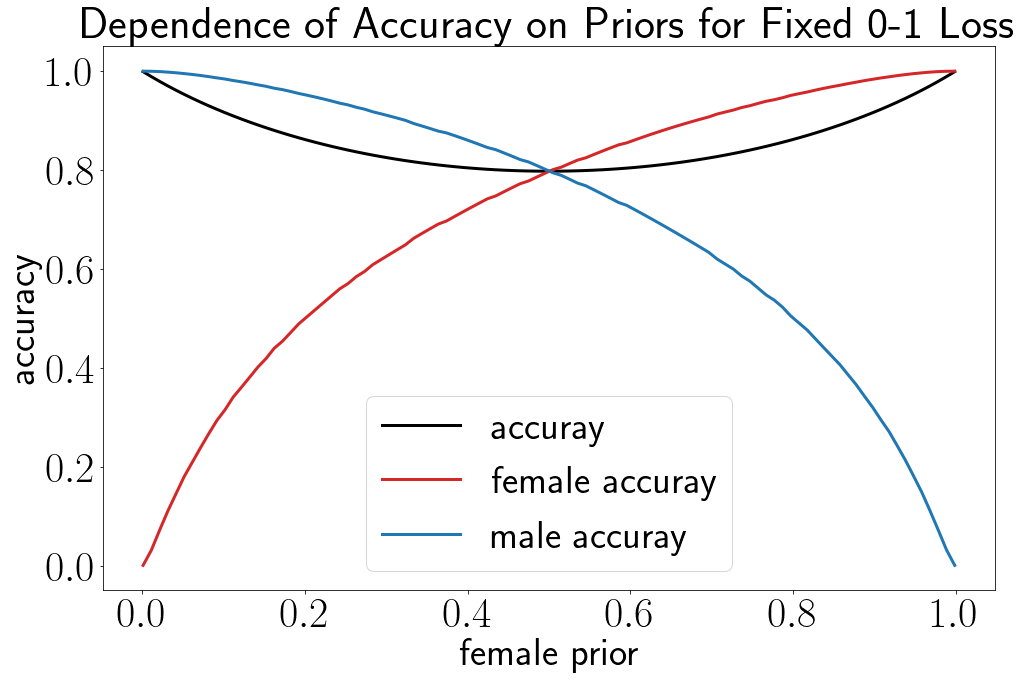

In [10]:
m_accuracy, f_accuracy, accuracy = [], [], []

priors_list = list(np.linspace(0.001, 0.999, 100))

loss_values = {
    'female': 1,
    'male': 1
}

for p in priors_list: 
    priors = {
        'female': p, 
        'male': 1-p
    }

    likelihoods = {
        'female': normal_dist(x, f_params['mean'], f_params['std']),
        'male': normal_dist(x, m_params['mean'], m_params['std'])
    }

    evidence = likelihoods['female'] * priors['female'] \
             + likelihoods['male'] * priors['male']

    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }

    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]

    # print("Decision Boundary:", decision_boundary)
    
    f_acc = norm(f_params['mean'], f_params['std']).cdf(decision_boundary)
    m_acc = 1.0 - norm(m_params['mean'], m_params['std']).cdf(decision_boundary)
    acc = f_acc * priors['female'] + m_acc * priors['male']

    f_accuracy.append(f_acc)
    m_accuracy.append(m_acc)
    accuracy.append(acc)

plt.figure(figsize=(16, 10))
plt.title('Dependence of Accuracy on Priors for Fixed 0-1 Loss', fontsize=45)
plt.plot(priors_list, accuracy, color='black', linewidth=3, label='accuray')
plt.plot(priors_list, f_accuracy, color='tab:red', linewidth=3, label='female accuray')
plt.plot(priors_list, m_accuracy, color='tab:blue', linewidth=3, label='male accuray')
plt.xlabel('female prior', fontsize=39)
plt.xticks(fontsize=42)
#plt.yticks([0.8, 0.85, 0.9, 0.95, 1.0])
plt.ylabel('accuracy', fontsize=39)
plt.yticks(fontsize=42)
plt.legend(fontsize=39)
plt.show()

# plt.savefig(f"report-latex/images/priors-accuracy.png", dpi=300, bbox_inches='tight', pad_inches=0.1)

### Further experiemnts

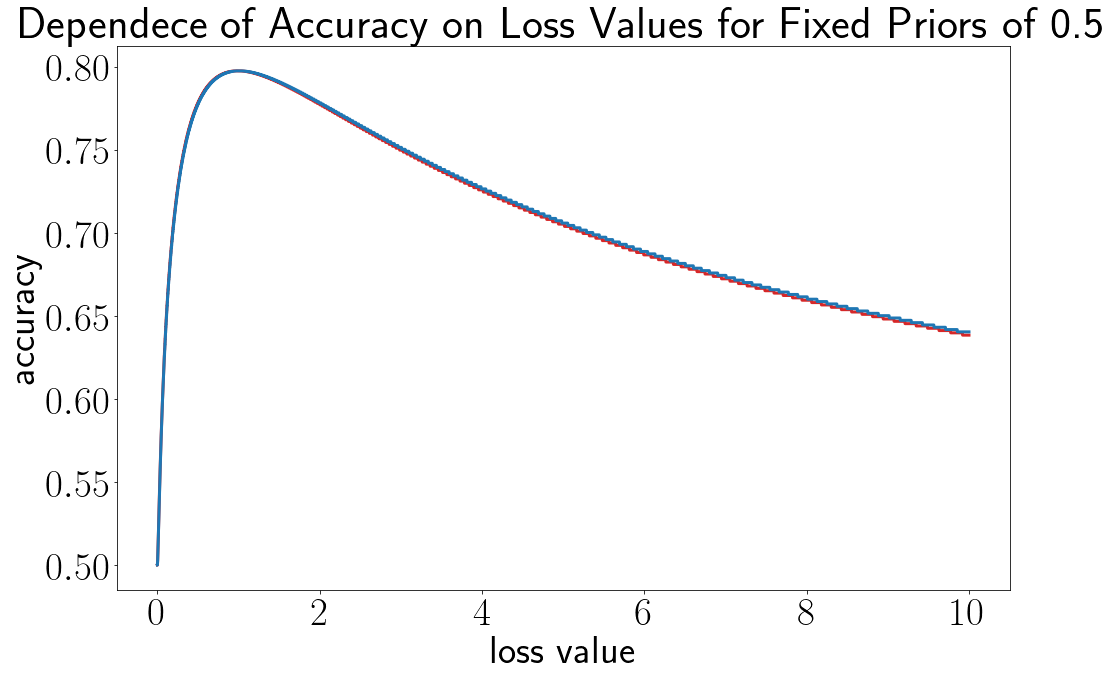

In [11]:
priors = {
    'female': 0.5,
    'male': 0.5
}

x_axis = np.arange(0, 10, 0.001)
f_accuracy, m_accuracy = [], []

for l in x_axis:
    loss_values = {
        'female': l,
        'male': 1
    }

    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }

    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]

    f_acc = norm(f_params['mean'], f_params['std']).cdf(decision_boundary)
    m_acc = 1.0 - norm(m_params['mean'], m_params['std']).cdf(decision_boundary)

    f_accuracy.append(np.array(f_acc) * priors['female'] + np.array(m_acc) * priors['male'])


for l in x_axis:
    loss_values = {
        'female': 1,
        'male': l
    }

    evidence = likelihoods['female'] * priors['female'] \
               + likelihoods['male'] * priors['male']
    
    posteriers = {
        'female': likelihoods['female'] * priors['female'] / evidence,
        'male': likelihoods['male'] * priors['male'] / evidence
    }

    conditional_errors = {
        'female': (1 - posteriers['female']) * loss_values['female'],
        'male': (1 - posteriers['male']) * loss_values['male']
    }

    decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
        return_counts=True)[1][0] - 1]

    f_acc = norm(f_params['mean'], f_params['std']).cdf(decision_boundary)
    m_acc = 1.0 - norm(m_params['mean'], m_params['std']).cdf(decision_boundary)

    m_accuracy.append(f_acc * priors['female'] + m_acc * priors['male'])

plt.figure(figsize=(16, 10))
plt.title('Dependece of Accuracy on Loss Values for Fixed Priors of 0.5', fontsize=45)
plt.plot(x_axis, f_accuracy, color='tab:red', linewidth=3, label=f'female (male is fixed to {loss_values["male"]})')
plt.plot(x_axis, m_accuracy, color='tab:blue', linewidth=3, label=f'male (female is fixed to {loss_values["female"]})')
plt.xlabel('loss value', fontsize=39)
plt.xticks(fontsize=39)
plt.ylabel('accuracy', fontsize=39)
plt.yticks(fontsize=39)
# plt.legend()
plt.show()

# plt.savefig(f"report-latex/images/loss_values-accuracy.png", dpi=300, bbox_inches='tight', pad_inches=0.1)


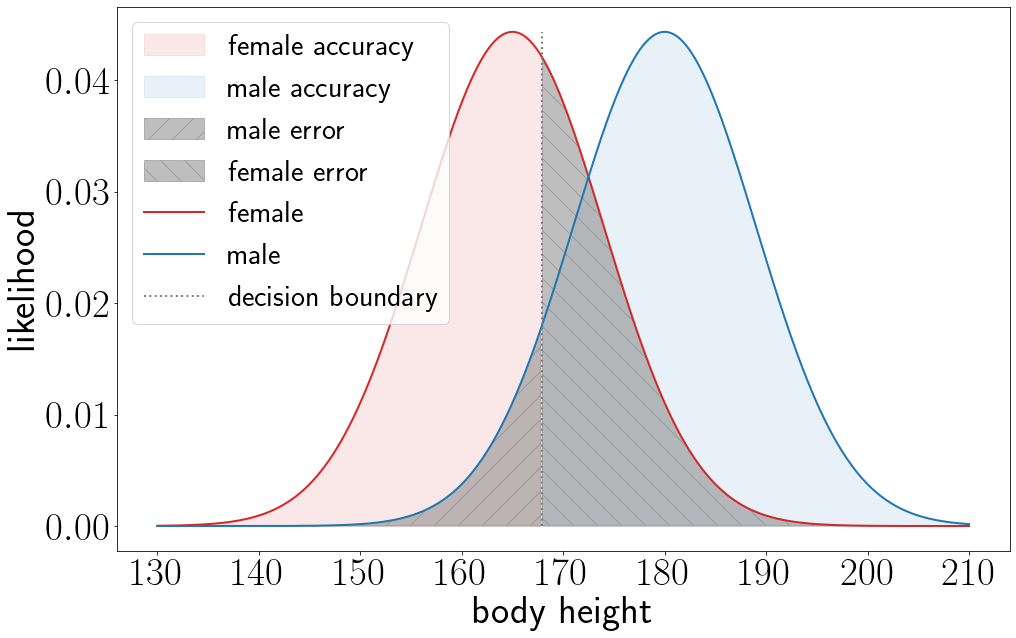

In [12]:
priors = {
    'female': 0.3,
    'male': 0.7
}

loss_values = {
    'female': 1.0,
    'male': 1.0
}

likelihoods = {
    'female': normal_dist(x, f_params['mean'], f_params['std']),
    'male': normal_dist(x, m_params['mean'], m_params['std'])
}

evidence = likelihoods['female'] * priors['female'] \
         + likelihoods['male'] * priors['male']

posteriers = {
    'female': likelihoods['female'] * priors['female'] / evidence,
    'male': likelihoods['male'] * priors['male'] / evidence
}

conditional_errors = {
    'female': (1 - posteriers['female']) * loss_values['female'],
    'male': (1 - posteriers['male']) * loss_values['male']
}

decision_boundary = x[np.unique(conditional_errors['female'] >= conditional_errors['male'], \
    return_counts=True)[1][0] - 1]


plt.figure(figsize=(16, 10))
plt.title('', fontsize=45)
plt.fill_between(x, likelihoods['female'], np.zeros(len(x)), where=x<decision_boundary, color='tab:red', alpha=0.1,  label='female accuracy')
plt.fill_between(x, likelihoods['male'], np.zeros(len(x)), where=x>decision_boundary,color='tab:blue', alpha=0.1, label='male accuracy')
plt.fill_between(x, likelihoods['male'], np.zeros(len(x)), where=x<decision_boundary, hatch='/', color='tab:gray', alpha=0.5, label='male error')
plt.fill_between(x, likelihoods['female'], np.zeros(len(x)), where=x>decision_boundary, hatch='\\', color='tab:gray', alpha=0.5, label='female error')
plt.plot(x, likelihoods['female'], label='female', c='tab:red')
plt.plot(x, likelihoods['male'], label='male', c='tab:blue')
plt.vlines(decision_boundary, 0, np.maximum(likelihoods['female'], likelihoods['male']).max(), color='gray', linestyle='dotted', label='decision boundary')
plt.xlabel('body height', fontsize=39)
plt.xticks(fontsize=39)
plt.ylabel('likelihood', fontsize=39)
plt.yticks(fontsize=39)
plt.legend()
plt.show()